Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

## Dataset games

Importamos el dataset

In [2]:
games = pd.read_csv('datasets/games_cleaned.csv')
games.head()

,publisher,genres,app_name,tags,discount_price,specs,price,early_access,id,developer,metascore,year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,2018
1,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",0.83,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,2017
2,Stegalosaurus Game Development,"['Action', 'Adventure', 'Casual', 'Indie', 'RPG']",Army of Tentacles: (Not) A Cthulhu Dating Sim:...,"['Action', 'Adventure', 'RPG', 'Indie', 'Casual']",8.79,"['Single-player', 'Steam Achievements']",10.99,False,770380.0,Stegalosaurus Game Development,NaN,2018
3,Apillo,"['Adventure', 'Casual', 'Indie', 'Simulation',...",The first thrust of God - All Aircrafts,"['Strategy', 'Adventure', 'Indie', 'Casual', '...",1.59,"['Single-player', 'Downloadable Content', 'Ste...",1.99,False,773690.0,Apillo,NaN,2018
4,Tero Lunkka,"['Action', 'Adventure', 'Indie']",The Warrior Of Treasures,"['Action', 'Adventure', 'Indie']",0.59,['Single-player'],0.99,False,768060.0,Tero Lunkka,NaN,2018


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       123 non-null    object 
 1   genres          123 non-null    object 
 2   app_name        123 non-null    object 
 3   tags            123 non-null    object 
 4   discount_price  123 non-null    float64
 5   specs           123 non-null    object 
 6   price           123 non-null    float64
 7   early_access    123 non-null    bool   
 8   id              123 non-null    float64
 9   developer       123 non-null    object 
 10  metascore       3 non-null      float64
 11  year            123 non-null    int64  
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 10.8+ KB


In [4]:
games.describe()

,discount_price,price,id,metascore,year
count,123.000000,123.000000,123.000000,3.000000,123.000000
mean,3.746585,6.038780,622583.390244,74.333333,2016.536585
std,4.968848,6.878159,160262.333273,8.504901,1.887373
min,0.490000,0.990000,72400.000000,66.000000,2000.000000
25%,0.690000,1.990000,491605.000000,70.000000,2016.000000
50%,1.790000,3.990000,691700.000000,74.000000,2017.000000
75%,4.365000,6.990000,762400.000000,78.500000,2017.000000
max,31.490000,34.990000,775690.000000,83.000000,2018.000000


Vamos a ver la distribución de juegos por año

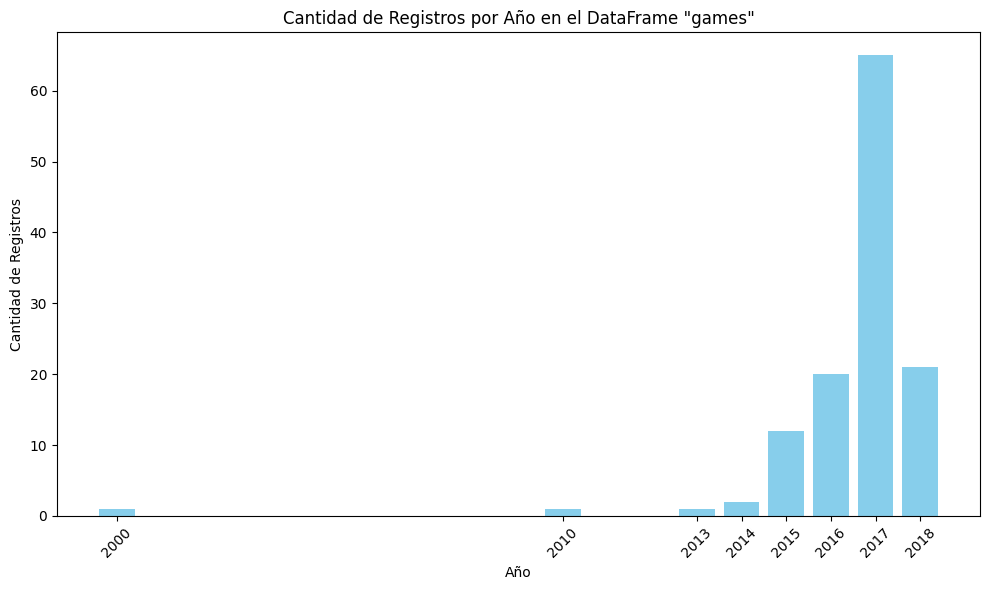

In [23]:
# Contar la cantidad de registros por año
conteo_por_año = games['year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_por_año.index, conteo_por_año.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Año en el DataFrame "games"')

# Establecer los valores del eje x como enteros
plt.xticks(conteo_por_año.index.astype(int), rotation=45)

plt.tight_layout()

# Mostrar el gráfico
plt.show()


Función para que el formato de la columna genres sea lista y no string

In [24]:
games['genres'] = games['genres'].apply(ast.literal_eval)

Vamos a ver la distribución de juegos por género

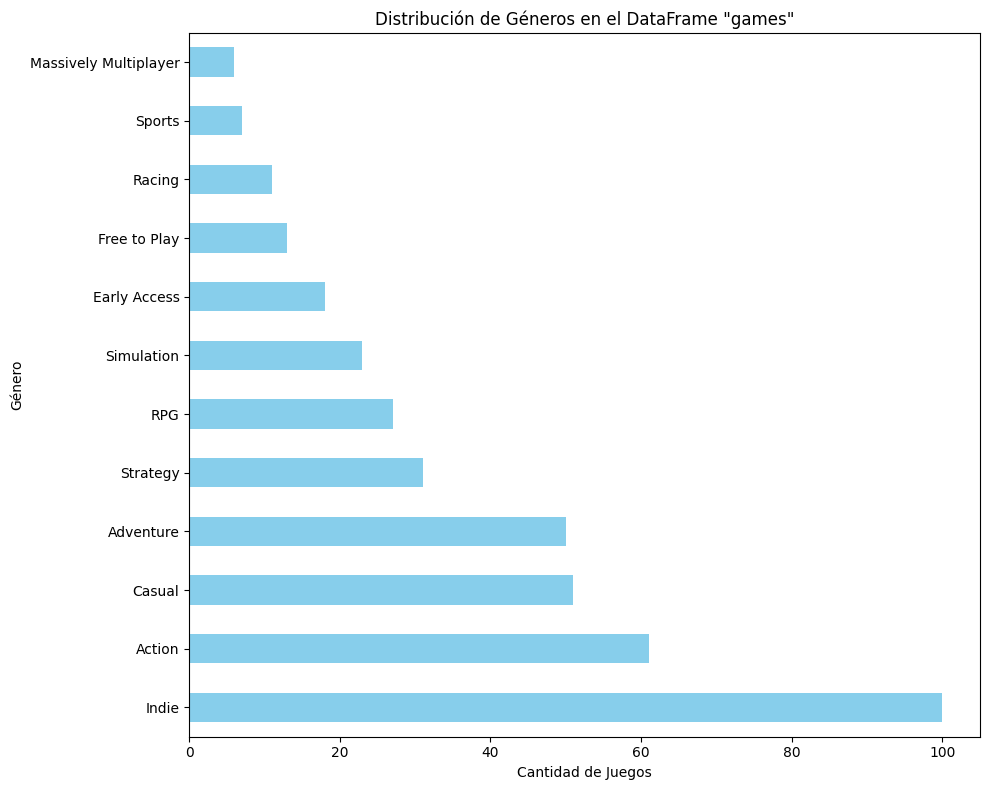

In [27]:
# Crear una lista para almacenar todos los géneros
todos_los_generos = []

# Iterar a través de la columna "genres" para obtener todos los géneros
for genres_lista in games['genres']:
    todos_los_generos.extend(genres_lista)

# Contar la cantidad de veces que aparece cada género
conteo_de_generos = pd.Series(todos_los_generos).value_counts()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
conteo_de_generos.plot(kind='barh', color='skyblue')
plt.ylabel('Género')
plt.xlabel('Cantidad de Juegos')
plt.title('Distribución de Géneros en el DataFrame "games"')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Dataset reviews

In [5]:
reviews = pd.read_csv('datasets/reviews_sentiment.csv')
reviews.head()

,item_id,user_id,recommend,polarity,sentiment_value
0,1250,0 76561197970982479\n1 ...,True,0.174444,1
1,22200,0 76561197970982479\n1 ...,True,0.337500,2
2,43110,0 76561197970982479\n1 ...,True,0.050000,1
3,251610,0 76561197970982479\n1 ...,True,0.114583,1
4,227300,0 76561197970982479\n1 ...,True,-0.036111,1


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          58430 non-null  int64  
 1   user_id          58430 non-null  object 
 2   recommend        58430 non-null  bool   
 3   polarity         58430 non-null  float64
 4   sentiment_value  58430 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 1.8+ MB


In [7]:
reviews.describe()

,item_id,polarity,sentiment_value
count,58430.000000,58430.000000,58430.000000
mean,169705.328188,0.114690,1.210234
std,132020.311111,0.294838,0.584614
min,10.000000,-1.000000,0.000000
25%,8930.000000,0.000000,1.000000
50%,218230.000000,0.059091,1.000000
75%,261640.000000,0.250000,2.000000
max,527340.000000,1.000000,2.000000


Vamos a ver la distribución de las veces que se recomendaron juegos y las veces que no

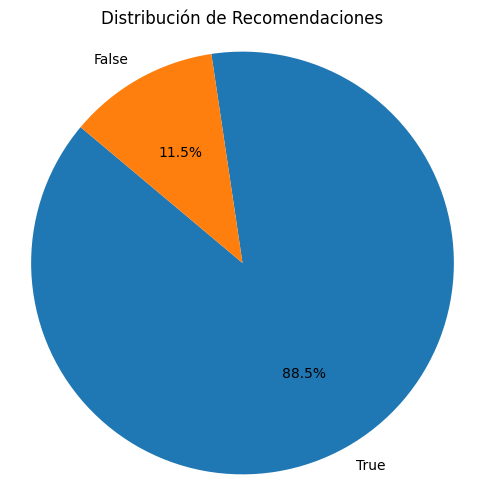

In [4]:
conteo_recomendaciones = reviews['recommend'].value_counts()

# Crear un gráfico de tarta
plt.figure(figsize=(6, 6))
plt.pie(conteo_recomendaciones, labels=conteo_recomendaciones.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Recomendaciones')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo

# Mostrar el gráfico de tarta
plt.show()

Vamos a ver la distribución del sentiment_value

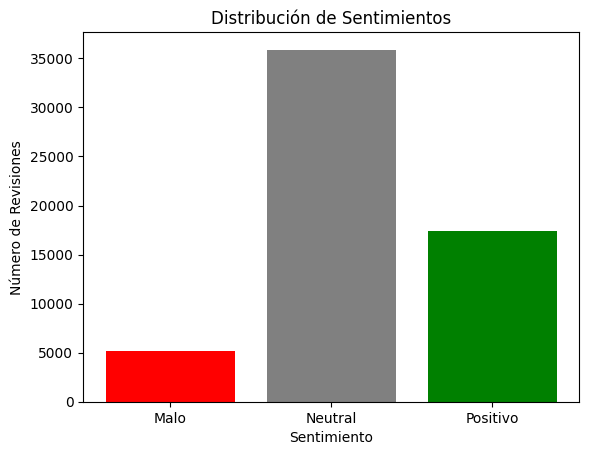

In [6]:
categorias = [0, 1, 2]
conteos = [len(reviews[reviews['sentiment_value'] == cat]) for cat in categorias]

# Definir las etiquetas para las categorías
etiquetas = ['Malo', 'Neutral', 'Positivo']

# Crear el gráfico de barras
plt.bar(categorias, conteos, tick_label=etiquetas, color=['red', 'gray', 'green'])

# Añadir un título y etiquetas de ejes
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Revisiones')


# Mostrar el gráfico
plt.show()

## Dataset items

In [8]:
items = pd.read_csv('datasets/items_desanidado.csv')
items.head()

,user_id,items_count,steam_id,items
0,76561197970982479,277,76561197970982479,"{'item_id': '10', 'item_name': 'Counter-Strike..."
1,76561197970982479,277,76561197970982479,"{'item_id': '20', 'item_name': 'Team Fortress ..."
2,76561197970982479,277,76561197970982479,"{'item_id': '30', 'item_name': 'Day of Defeat'..."
3,76561197970982479,277,76561197970982479,"{'item_id': '40', 'item_name': 'Deathmatch Cla..."
4,76561197970982479,277,76561197970982479,"{'item_id': '50', 'item_name': 'Half-Life: Opp..."


In [9]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   items_count  int64 
 2   steam_id     int64 
 3   items        object
dtypes: int64(2), object(2)
memory usage: 157.3+ MB


In [10]:
items.describe()

,items_count,steam_id
count,5.153209e+06,5.153209e+06
mean,3.147229e+02,7.656120e+16
std,6.933596e+02,3.916645e+07
min,1.000000e+00,7.656120e+16
25%,7.200000e+01,7.656120e+16
50%,1.380000e+02,7.656120e+16
75%,2.760000e+02,7.656120e+16
max,7.762000e+03,7.656120e+16
